## 第一次作业

In [1]:
from math import *
#WGS84经纬度坐标转Web墨卡托投影坐标
def WGS84_to_WebM(lon,lat):
    r = 20037508.34
    x = (lon * r) / 180
    y = log(tan(pi/4 + lat * pi /360))* r / pi
    return x,y
#location是输入信息
location = input("输入经度和纬度坐标（之间用逗号分隔）：")
#截取lon,lat为经纬度坐标
lon, lat = location.split(',')
#格式处理
lon=eval(lon)
lat=eval(lat)
#坐标转换
x,y=WGS84_to_WebM(lon,lat)
#输出坐标
print("x:{:.2f},y:{:.2f}".format(x,y))

x:13358338.89,y:3503549.84


In [11]:
from math import *
#Web墨卡托投影坐标转WGS84经纬度坐标
def WebM_to_WGS84(x,y):
    r = 20037508.34
    lon = (x * 180) / r
    lat = atan(e ** (y * pi / r)) * 360 / pi - 90
    return lon,lat
#location是输入信息
location = input("输入x和y投影坐标（之间用逗号分隔）：")
#截取lon,lat为经纬度坐标
x, y = location.split(',')
#格式处理
x=eval(x)
y=eval(y)
#坐标转换
lon,lat=WebM_to_WGS84(x,y)
#输出坐标
print("经度:{:.2f},纬度:{:.2f}".format(lon,lat))

输入x和y投影坐标（之间用逗号分隔）：13358338,3503549
经度:120.00,纬度:30.00


## 第二次作业

In [3]:
from math import *
import requests
for z in [15]:
    #设置坐标范围
    Xmin=13518000
    Xmax=13521000
    Ymin=3636000
    Ymax=3638100
    #d为缩放比例尺
    d = 40075014/(2**int(z))
    #计算相对应的行列数
    rowYmin = int((20037507-Ymax)/d)
    rowYmax = int((20037507-Ymin)/d)
    colXmin = int((Xmin-(-20037507))/d)
    colXmax = int((Xmax-(-20037507))/d)
    #循环得到各自地图切片
    for x in range(colXmin, colXmax+1):
        for y in range(rowYmin,rowYmax+1):
            #写入图片
            url = f"https://a.tile.openstreetmap.org/{z}/{x}/{y}.png"
            response = requests.get(url)
            f = open(f"{z}_{x}_{y}.png", "wb")
            f.write(response.content)
            f.close()
            #写入world文件
            LU_y = 20037507 - (d*y)
            LU_x = (d*x) - 20037507
            x_resolution = d/256
            y_resolution = d/256
            text = f"{x_resolution}\n0\n0\n-{y_resolution}\n{LU_x}\n{LU_y}"
            f = open(f"{z}_{x}_{y}.pngw", "w")
            f.write(text)
            f.close()


## 第三次作业

### 因为我的anaconda烂了，我的pyproj是在Docker里安装的，代码也是在Docker里写的，然后Docker配置里自动下载的pyproj版本是2.6，比现在的3要低，所以有些函数用不了（比如说老师给的pyproj.list.get_proj_operations_map()，我只能用pyproj.get_proj_operations_map()，虽然他们的效果是一样的
### 都怪python库里面的版本不兼容！！！
### 如果老师和助教感兴趣的话，可以帮忙看看我封装好的Docker环境qwq
### 在VSCode里打开然后reopen in docker container就可以了

### 1）根据上海2000坐标系的定义，构建上海2000坐标系的proj4字符串或字典。


####  以东经121°27′52″为中央子午线的高斯-克吕格投影坐标系统，计算东经121°28′01″、北纬31°14′07″点的投影坐标（x和y），然后在已定义的高斯-克吕格投影坐标系统中增加东偏（x_0）和北偏（y_0）参数，参数值分别为-x和-y（精度保留到厘米）。
#### 以东经121°27′52″作为中央子午线，坐标系统原点位于东经121°28′01″与北纬31°14′07″的交点，采用的地球椭球体与国家的CGCS2000参考框架一致（地球椭球体参数与WGS84基本一致）。

In [60]:
#观察一下CGS2000的具体信息
crs2=CRS.from_epsg(4490)
print(crs2)
print(crs2.to_dict())
print(crs2.to_proj4())
print(crs2.to_wkt())
crs2.to_wkt()

epsg:4490
{'proj': 'longlat', 'ellps': 'GRS80', 'no_defs': None, 'type': 'crs'}
+proj=longlat +ellps=GRS80 +no_defs +type=crs
GEOGCRS["China Geodetic Coordinate System 2000",DATUM["China 2000",ELLIPSOID["CGCS2000",6378137,298.257222101,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["unknown"],AREA["China"],BBOX[16.7,73.62,53.56,134.77]],ID["EPSG",4490]]
/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
<ipython-input-60-15afe3dd4f0c>:5: UserWarning: You will likely lose important projection 

'GEOGCRS["China Geodetic Coordinate System 2000",DATUM["China 2000",ELLIPSOID["CGCS2000",6378137,298.257222101,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],USAGE[SCOPE["unknown"],AREA["China"],BBOX[16.7,73.62,53.56,134.77]],ID["EPSG",4490]]'

In [9]:
from pyproj import CRS, Transformer
#CRS.from_epsg(2346)

dc={'proj': 'tmerc',  'lon_0': 121.4644444, 'k': 1, 'x_0': 0, 'y_0': 0, 'ellps': 'GRS80','units': 'm', 'no_defs': None, 'type': 'crs'}
transformer = Transformer.from_crs(4490,dc,always_xy=True)
transed=transformer.transform(121.46694444444445,31.235277777777778)
print("东经121°28′01″、北纬31°14′07″点的投影坐标\nx:{:.2f},y:{:.2f}".format(transed[0],transed[1]))
#因为datum里找不到CGS2000所对应的值，所以在定义字典的时候没有加上datum的信息，我决定让他默认定义了
#椭球体采用GRS80是因为在查询CGS2000的信息的时候（使用了crs.to_proj4查看椭球体信息，然后发现居然不是WGS84，是GRS80，为了尊重“采用的地球椭球体与国家的CGCS2000参考框架一致”的要求，我就用GRS80啦
#顺便，通过wkt文本查看的CGCS2000的椭球体的参数和ArcGIS里的参数不一样……我使用已经定义好的CGCS2000了，也可以使用长短轴定义，但怕字典过长不好修改就算了

东经121°28′01″、北纬31°14′07″点的投影坐标
x:238.18,y:3457059.92


In [10]:
SHdict={'proj': 'tmerc', 'lat_0': 31.2352777, 'lon_0': 121.4644444, 'k': 1, 'x_0': -238.18, 'y_0': -3457059.92, 'ellps': 'GRS80', 'units': 'm', 'no_defs': None, 'type': 'crs'}
SHdict

{'proj': 'tmerc',
 'lat_0': 31.2352777,
 'lon_0': 121.4644444,
 'k': 1,
 'x_0': -238.18,
 'y_0': -3457059.92,
 'ellps': 'GRS80',
 'units': 'm',
 'no_defs': None,
 'type': 'crs'}

### 2）产生上海2000坐标系的wkt crs文本（WKT1_ESRI版本）。


In [11]:
from pyproj import CRS
from pyproj.enums import WktVersion
crs = CRS.from_dict(SHdict)
#crs = CRS.from_epsg(4490)
print("上海2000坐标系的wkt crs文本（WKT1_ESRI版本）\n")
print(crs.to_wkt(version=WktVersion.WKT1_ESRI,pretty=True))
#参考了老师放在ppt里的代码XD

上海2000坐标系的wkt crs文本（WKT1_ESRI版本）

PROJCS["unknown",
    GEOGCS["GCS_unknown",
        DATUM["D_Unknown_based_on_GRS80_ellipsoid",
            SPHEROID["GRS_1980",6378137.0,298.257222101]],
        PRIMEM["Greenwich",0.0],
        UNIT["Degree",0.0174532925199433]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["False_Easting",-238.18],
    PARAMETER["False_Northing",-3457059.92],
    PARAMETER["Central_Meridian",121.4644444],
    PARAMETER["Scale_Factor",1.0],
    PARAMETER["Latitude_Of_Origin",31.2352777],
    UNIT["Meter",1.0]]


### 3）计算某个点（121.456,31.038，CGCS 2000地理坐标）的上海2000坐标。


In [12]:
from pyproj import Transformer
transformer = Transformer.from_crs(4490,SHdict,always_xy=True)
plot = transformer.transform(121.456,31.038)
print(" 2000地理坐标（121.456,31.038，CGCS）的上海2000坐标:\nx:{:.2f},y:{:.2f}".format(plot[0],plot[1]))

 2000地理坐标（121.456,31.038，CGCS）的上海2000坐标:
x:-1044.34,y:-3478932.43


### 4）如proj4字符串或字典中的地球椭球体改为IAU76，分析一下同个点的投影值差异（与地球椭球体为WGS84）.


In [13]:
from pyproj import Transformer
SHdict={'proj': 'tmerc', 'lat_0': 31.2352777, 'lon_0': 121.4644444, 'k': 1, 'x_0': 500000, 'y_0': 0, 'ellps': 'WGS84',  'units': 'm', 'no_defs': None, 'type': 'crs'}
SHdict2={'proj': 'tmerc', 'lat_0': 31.2352777, 'lon_0': 121.4644444, 'k': 1, 'x_0': 500000, 'y_0': 0, 'ellps': 'IAU76', 'units': 'm', 'no_defs': None, 'type': 'crs'}
transformer1 = Transformer.from_crs(4490,SHdict,always_xy=True)
transformer2 = Transformer.from_crs(4490,SHdict2,always_xy=True)
plot1 = transformer1.transform(121.456,31.038)
plot2 = transformer2.transform(121.456,31.038)
print("WGS84:",plot1)
print(" WGS84椭球体（121.456,31.038，CGCS）的投影后坐标:\nx:{:.2f},y:{:.2f}".format(plot1[0],plot1[1]))
print(" IAU76椭球体（121.456,31.038，CGCS）的投影后坐标:\nx:{:.2f},y:{:.2f}".format(plot2[0],plot2[1]))

WGS84: (499193.8437847696, -21872.506261482235)
 WGS84椭球体（121.456,31.038，CGCS）的投影后坐标:
x:499193.84,y:-21872.51
 IAU76椭球体（121.456,31.038，CGCS）的投影后坐标:
x:499193.84,y:-21872.52


### 5）计算两个点（121.456，31.038；121.399，31.064，均为CGCS 2000地理坐标）投影到上海2000坐标系后的距离和投影到高斯-克吕格坐标系（epsg编码值为2346）后的距离差异。


In [14]:
from pyproj import Transformer
from math import *
SHdict={'proj': 'tmerc', 'lat_0': 31.2352777, 'lon_0': 121.4644444, 'k': 1, 'x_0': 500000, 'y_0': 0, 'ellps': 'WGS84', 'datum':'WGS84', 'units': 'm', 'no_defs': None, 'type': 'crs'}
#两个坐标
spot1 =(121.456,31.038)
spot2 = (121.399,31.064)
#定义两个Transformer
transformer1 = Transformer.from_crs(4490,SHdict,always_xy=True)
transformer2 = Transformer.from_crs(4490,2346,always_xy=True)
#投影到上海2000坐标系后的坐标点
psot1=transformer1.transform(spot1[0],spot1[1])
psot2=transformer1.transform(spot2[0],spot2[1])
#投影到高斯-克吕格坐标系后的坐标点
ppot1=transformer2.transform(spot1[0],spot1[1])
ppot2=transformer2.transform(spot2[0],spot2[1])
#计算距离
distance1=sqrt((psot1[0]-psot2[0])**2+(psot1[1]-psot2[1])**2)
distance2=sqrt((ppot1[0]-ppot2[0])**2+(ppot1[1]-ppot2[1])**2)
#输出
print("投影到上海2000坐标系后的距离:{:.2f}m".format(distance1))
print("投影到高斯-克吕格坐标系后的距离:{:.2f}m".format(distance2))
print("距离差异：{:.2f}m".format(abs(distance1-distance2)))

投影到上海2000坐标系后的距离:6157.30m
投影到高斯-克吕格坐标系后的距离:6159.01m
距离差异：1.71m


#### 保留的函数


In [15]:
from pyproj import CRS
import pyproj
ProjDict=pyproj.get_proj_operations_map()
MapList=pyproj.get_ellps_map()
#MapList
ProjDict

{'adams_hemi': 'Adams Hemisphere in a Square',
 'adams_ws1': 'Adams World in a Square I',
 'adams_ws2': 'Adams World in a Square II',
 'aea': 'Albers Equal Area',
 'aeqd': 'Azimuthal Equidistant',
 'affine': 'Affine transformation',
 'airy': 'Airy',
 'aitoff': 'Aitoff',
 'alsk': 'Mod. Stereographic of Alaska',
 'apian': 'Apian Globular I',
 'august': 'August Epicycloidal',
 'axisswap': 'Axis ordering',
 'bacon': 'Bacon Globular',
 'bertin1953': 'Bertin 1953',
 'bipc': 'Bipolar conic of western hemisphere',
 'boggs': 'Boggs Eumorphic',
 'bonne': 'Bonne (Werner lat_1=90)',
 'calcofi': 'Cal Coop Ocean Fish Invest Lines/Stations',
 'cart': 'Geodetic/cartesian conversions',
 'cass': 'Cassini',
 'cc': 'Central Cylindrical',
 'ccon': 'Central Conic',
 'cea': 'Equal Area Cylindrical',
 'chamb': 'Chamberlin Trimetric',
 'collg': 'Collignon',
 'col_urban': 'Colombia Urban',
 'comill': 'Compact Miller',
 'crast': 'Craster Parabolic (Putnins P4)',
 'defmodel': 'Deformation model',
 'deformation': 

## 第四次作业

### 此段程序由Docker配置, 可以从我的Docker仓库wingnes/segis获得相应的Docker镜像配置, 使用miniconda(conda version 4.10.1), 对应python版本3.8.5, 已装有pyproj, jupyter, requests, gdal, fiona, geopandas等库。

In [2]:
from osgeo import gdal
import fiona
from shapely.geometry import Point

### 已有我国的地级市城市分布数据（china_city.shp）（图1），空间参照系统为Albers投影坐标（详见prj文件）。现要根据某个地震的发生位置（假定坐标为东经101度，北纬27度，空间参照系统为WGS84），提取位于该位置300公里范围内的城市，并产生一个shapefile文件（图2），同时打印输出城市名。
### 1）输出文件的driver、schema、crs同china_city.shp，由于涉及汉字，需要定义encoding关键词参数为'utf8'。
### 2）地震位置的坐标要转换成同china_city.shp一致的坐标参照系统。利用pyproj包Transformer模块中的from_crs(crs_from,crs_to)函数转换坐标时，crs参数可以是proj4字典，即Collection对象的crs属性值。
### 3）操作结束后，应关闭Collection对象（利用Collection对象的close()方法）。
### 4）输入输出文件放在和程序同个文件夹中，读写文件使用相对路径（文件名前不加路径）。

In [7]:
# 引库
import pprint
import fiona
from pyproj import CRS
from pyproj import Transformer
from shapely.geometry import Point

# 打开源文件
source = fiona.open('china_city.shp', 'r', encoding='utf-8')
source_driver = source.driver
source_crs = source.crs
source_schema = source.schema

# 给地震中心制作范围为300公里的buffer

center = (101,27)
# center的坐标是WGS84，EPSG编号4326，需要投影到的坐标是之前读取文件时读入的crs
transformer = Transformer.from_crs(4326, source_crs, always_xy=True)
# 投影到Albers坐标系后的坐标点
pcenter=transformer.transform(center[0], center[1])
cPoint = Point(pcenter)
# 制作buffer
cBuffer = cPoint.buffer(300000)

# 打开写入文件
target = fiona.open('cities_affected.shp', 'w', encoding='utf-8',
                    driver=source_driver,
                    crs=source_crs, 
                    schema=source_schema)

for record in source:
    coordinates = record['geometry']['coordinates']
    # # 判断类型
    # print(record['geometry']['type'])
    nowRecord = Point(coordinates)
    
# 判断，写入位于缓冲区内的城市
    if nowRecord.intersects(cBuffer):
        target.write(record)
        # 输出城市名称
        NAME = record['properties']['city_name']
        print(NAME)
# 关闭文件
target.close()
source.close()


楚雄市
保山市
大理市
怒江傈僳族自治州
泸水县
东川市
攀枝花市
丽江纳西族自治县
昭通市
中甸县
西昌市


In [8]:
# 打开prj读入crs的情况
# ff=open('china_city.prj', 'r')
# crs= CRS.from_wkt(ff.read())
# crs

# 查看shp中的所有记录
# for record in cities:
#     NAME = record['properties']['city_name']
#     Lon = record['properties']['Lon']
#     Lat = record['properties']['Lat']
#     coordinates = record['geometry']['coordinates']
#     print(f'{NAME}:{Lon},{Lat}')

## 第五次作业
### 此段程序由Docker配置, 可以从我的Docker仓库wingnes/segis获得相应的Docker镜像配置, 使用miniconda(conda version 4.10.1), 对应python版本3.8.5, 已装有pyproj, jupyter, requests, gdal, fiona, geopandas等库。

### 我国的省级行政区划数据（china_provinces.shp）和道路数据（china_roads.shp），空间参照系统均为Albers投影坐标，坐标单位为米。
### 通过两个数据的叠置操作计算每个省的道路总长度和道路密度（每平方公里的道路长度），并把计算结果作为新的字段添加到china_provinces.shp数据中，保存为一个新的shapefile文件，同时按道路密度以梯度色显示每个省，并显示图例（如图1）。
### 1）道路长度的单位为km，保留小数点后面三位；道路密度的单位为km/km2，保留小数点后面4位。
### 2）plot()方法的column参数用于设置按哪个字段值进行颜色设置，如column='road_density'表示按road_density字段进行颜色设置；cmap参数表示用哪种颜色梯度，如Greys、Purples、Blues、Greens、Oranges，详细可查阅 https://matplotlib.org/stable/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py；legend表示是否显示图例，True表示显示图例。利用plot()方法绘制地图的详细介绍可参考https://geopandas.org/docs/user_guide/mapping.html。
### 3）写shapefile文件时，如涉及汉字，需定义encoding关键词参数为'utf8'。
### 4）输入输出文件放在和程序同个文件夹中，读写文件使用相对路径（文件名前不加路径）。

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

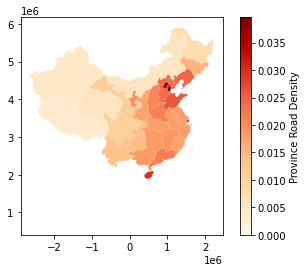

In [2]:
# 导库
# from shapely.geometry import Point
# from shapely.geometry import LineString
# from shapely.geometry import Polygon
import geopandas as gpd
# from decimal import *
# import fiona

# 读入数据
provinces = gpd.GeoDataFrame.from_file('china_provinces.shp',encoding="utf8")
roads = gpd.GeoDataFrame.from_file('china_roads.shp',encoding="utf8")
# source = fiona.open('china_provinces.shp', 'r', encoding='utf-8')
# source_driver = source.driver
# source_crs = source.crs
# source_schema = source.schema

# # 画一个图先
# ax1 = provinces.plot()
# roads.plot(color="r",ax=ax1,zorder=1,linewidth=0.5)

# 计算不同省的道路长度和密度
lineLength=[]
lineDensity=[]
for i in range(provinces.shape[0]):

    nowPro_poly = provinces.iloc[i]["geometry"]
    nowPro_area = nowPro_poly.area/1000000
    now_line = roads[roads.intersects(nowPro_poly)]
    now_line["geometry"] = now_line.intersection(nowPro_poly)
    
    nowline_length = now_line.length.sum()/1000
    nowlineDensity = nowline_length/nowPro_area
    
    
    lineLength.append(round(nowline_length,3))
    lineDensity.append(round(nowlineDensity,4))

# 从原来的文件中复制出新的geodataframe并且添加新列
provinces_write = provinces
provinces_write["length"] = lineLength
provinces_write["density"] = lineDensity

# 写入文件
provinces_write.to_file("output_provinces.shp",encoding='utf-8')

# 画图
provinces_write.plot(column='density',legend=True,legend_kwds={'label': "Province Road Density"},cmap='OrRd')